# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

response = requests.get(query_url + cities[0]).json()
response

{'coord': {'lon': 13.84, 'lat': -11.2},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 69.79,
  'pressure': 1013.61,
  'humidity': 88,
  'temp_min': 69.79,
  'temp_max': 69.79,
  'sea_level': 1013.61,
  'grnd_level': 1013.65},
 'wind': {'speed': 9.69, 'deg': 199.924},
 'clouds': {'all': 63},
 'dt': 1566671355,
 'sys': {'message': 0.0064,
  'country': 'AO',
  'sunrise': 1566623573,
  'sunset': 1566666107},
 'timezone': 3600,
 'id': 3346015,
 'name': 'Sumbe',
 'cod': 200}

In [4]:
lat = []
humidity = []
cloud = []
wind_speed = []
country = []
city_name = []
date = []
max_temp = []
lng = []
units = "imperial"
counter = 0
url = "http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={api_key}&units={units}&q="


print(f"Beginning Data Retrieval")
print (f"-----------------------------")
       
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        counter = counter + 1
        print(f"Processing Record {counter} | {city}")
        city_name.append(response['name'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        cloud.append(response['clouds']['all'])
        time.sleep(1)
       
    except KeyError:
        print("City not found. Skipping...") 
        
print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 | sumbe
Processing Record 2 | tiksi
Processing Record 3 | cockburn town
Processing Record 4 | busselton
Processing Record 5 | paragominas
Processing Record 6 | pareora
Processing Record 7 | vaini
Processing Record 8 | iztapa
Processing Record 9 | bambous virieux
Processing Record 10 | goderich
Processing Record 11 | codrington
Processing Record 12 | dunedin
Processing Record 13 | nanortalik
Processing Record 14 | usinsk
Processing Record 15 | westport
Processing Record 16 | los llanos de aridane
Processing Record 17 | ushuaia
Processing Record 18 | castro
Processing Record 19 | bow island
Processing Record 20 | alta floresta
Processing Record 21 | kaitangata
Processing Record 22 | east london
Processing Record 23 | albany
Processing Record 24 | attawapiskat
City not found. Skipping...
Processing Record 25 | diamantino
Processing Record 26 | hermanus
Processing Record 27 | qaanaaq
Processing Record 28 | jamestown

Processing Record 231 | sentyabrskiy
City not found. Skipping...
Processing Record 232 | nizhniy odes
Processing Record 233 | krasnoselkup
City not found. Skipping...
Processing Record 234 | kahului
Processing Record 235 | moth
Processing Record 236 | oyama
Processing Record 237 | sembakung
Processing Record 238 | beringovskiy
Processing Record 239 | mahaicony
City not found. Skipping...
Processing Record 240 | geraldton
Processing Record 241 | coquimbo
Processing Record 242 | beisfjord
Processing Record 243 | longyearbyen
Processing Record 244 | victoria
Processing Record 245 | ryotsu
Processing Record 246 | rio gallegos
Processing Record 247 | zhezkazgan
Processing Record 248 | airai
Processing Record 249 | urumqi
City not found. Skipping...
Processing Record 250 | seymchan
Processing Record 251 | dubrovka
Processing Record 252 | port keats
Processing Record 253 | hobyo
Processing Record 254 | yarada
Processing Record 255 | buala
Processing Record 256 | namibe
Processing Record 257 |

Processing Record 458 | kangaatsiaq
Processing Record 459 | juba
Processing Record 460 | road town
Processing Record 461 | kaabong
Processing Record 462 | aberystwyth
Processing Record 463 | hirara
Processing Record 464 | dhemaji
Processing Record 465 | ordzhonikidze
Processing Record 466 | majengo
Processing Record 467 | codajas
Processing Record 468 | warqla
City not found. Skipping...
Processing Record 469 | suao
City not found. Skipping...
Processing Record 470 | union de tula
Processing Record 471 | pastavy
Processing Record 472 | mocuba
Processing Record 473 | laguna seca
Processing Record 474 | zalantun
Processing Record 475 | saskylakh
Processing Record 476 | richards bay
Processing Record 477 | kovdor
Processing Record 478 | yarega
Processing Record 479 | oparino
Processing Record 480 | kavaratti
Processing Record 481 | isla vista
Processing Record 482 | rolim de moura
City not found. Skipping...
Processing Record 483 | vardo
Processing Record 484 | san policarpo
Processing Re

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dict = {
    "City": city_name,
    "Cloudiness": cloud,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Long": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}
weather_df = pd.DataFrame(weather_dict)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Long,Max Temp,Wind Speed
0,Sumbe,63,AO,1566671355,88,-11.20,13.84,69.79,9.69
1,Tiksi,100,RU,1566671357,96,71.64,128.87,48.19,2.98
2,Cockburn Town,84,TC,1566671325,78,21.46,-71.14,84.01,18.37
3,Busselton,100,AU,1566670982,56,-33.64,115.35,46.00,11.18
4,Paragominas,29,BR,1566671360,45,-3.00,-47.35,89.95,7.09


In [6]:
weather_df.to_csv("fileOne.csv", index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

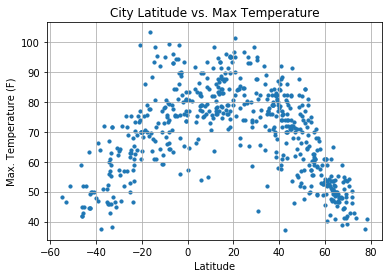

In [7]:
# Build a scatter plot for each data type

plt.scatter(weather_df["Lat"], weather_df["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties

plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure

plt.savefig("Max_Temp_vs_Latitude.png")

# Show plot

plt.show()

#### Latitude vs. Humidity Plot

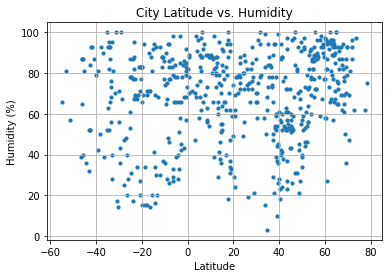

In [8]:
# Build a scatter plot for each data type

plt.scatter(weather_df["Lat"], weather_df["Humidity"], marker="o", s=10)

# Incorporate the other graph properties

plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure

plt.savefig("Humidity_vs_Latitude.png")

# Show plot

plt.show()

#### Latitude vs. Cloudiness Plot

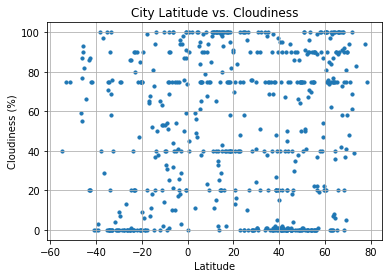

In [9]:
# Build a scatter plot for each data type

plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties

plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure

plt.savefig("Cloudiness_vs_Latitude.png")

# Show plot

plt.show()

#### Latitude vs. Wind Speed Plot

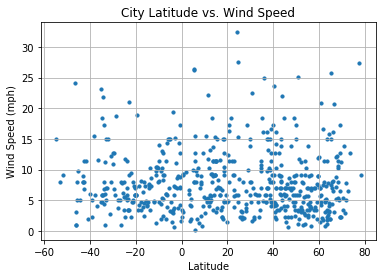

In [10]:
# Build a scatter plot for each data type

plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties

plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure

plt.savefig("Wind_Speed_vs_Latitude.png")

# Show plot

plt.show()